In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 5: Collections of Random Variables

## Objectives

+ To practice with the joint probability mass function.

## Joint probability mass function of two discrete random variables

Take two discrete random variabls $X$ and $Y$.
Say that $X$ takes $5$ values, $0,1,\dots,4$, and $Y$ takes $10$ values, $0,1,\dots,9$.
Then, you can think of the joint probability mass function of $X$ and $Y$ as the $5\times 10$ matrix:
$$
A_{ij} = p(X=i, Y=j).
$$
Let's make up such a matrix to play with:

In [71]:
# This is to make sure that we all get the same results
np.random.seed(12345)
# First I draw a matrix with random entries in [0,1]
A = np.random.rand(5, 10)
print(A)

[[0.92961609 0.31637555 0.18391881 0.20456028 0.56772503 0.5955447
  0.96451452 0.6531771  0.74890664 0.65356987]
 [0.74771481 0.96130674 0.0083883  0.10644438 0.29870371 0.65641118
  0.80981255 0.87217591 0.9646476  0.72368535]
 [0.64247533 0.71745362 0.46759901 0.32558468 0.43964461 0.72968908
  0.99401459 0.67687371 0.79082252 0.17091426]
 [0.02684928 0.80037024 0.90372254 0.02467621 0.49174732 0.52625517
  0.59636601 0.05195755 0.89508953 0.72826618]
 [0.81835001 0.50022275 0.81018941 0.09596853 0.21895004 0.25871906
  0.46810575 0.4593732  0.70950978 0.17805301]]


In [76]:
# And then I scale it so that the sum of all elements is one:
Anorm = A / np.sum(A)
print('A = ', Anorm)
print('Sum of A_ij = {0:1.2f}'.format(np.sum(Anorm)))

A =  [[0.03382266 0.01151084 0.0066916  0.00744261 0.0206558  0.02166798
  0.03509238 0.02376485 0.02724782 0.02377914]
 [0.02720446 0.03497567 0.0003052  0.00387282 0.01086788 0.02388251
  0.02946379 0.03173278 0.03509722 0.02633018]
 [0.02337548 0.02610345 0.01701287 0.0118459  0.01599579 0.02654862
  0.0361657  0.02462701 0.02877286 0.00621845]
 [0.00097687 0.02912024 0.03288056 0.00089781 0.01789147 0.01914699
  0.02169786 0.0018904  0.03256646 0.02649685]
 [0.02977441 0.01819984 0.0294775  0.00349167 0.00796616 0.0094131
  0.01703131 0.01671359 0.02581442 0.00647819]]
Sum of A_ij = 1.00


Now we have a matrix that corresponds to a proper joint probability mass function.

Okay, this is great we can sample from this. Let's find now the probability mass function of just $X$.
Remember that you need to marginalize:
$$
p(x) = \sum_{y} p(x,y) = \sum_{y} A_{xy}.
$$
This is easy

In [18]:
p_x = np.sum(A, axis=1) # Axis = 1 tells sum to sum only the second axis
print('pmf of just X:', p_x)

pmf of just X: [0.21167568 0.2237325  0.21666614 0.1835655  0.16436018]


In [19]:
# Verify that this is indeed a pmf:
print('sum of p_x = {0:1.2f}'.format(np.sum(p_x)))

sum of p_x = 1.00


With this you can easily find the expectation of $X$:

In [20]:
E_X = np.sum(np.arange(5) * p_x)
print('E[X] = {0:1.2f}'.format(E_X))

E[X] = 1.87


Similarly for the variance of X:

In [21]:
E_X2 = np.sum(np.arange(5) ** 2 * p_x)
V_X = E_X2 - E_X ** 2
print('V[X] = {0:1.2f}'.format(V_X))

V[X] = 1.89


Let's do the same for $Y$:

In [22]:
p_y = np.sum(A, axis=0)
print('pmf of just Y:', p_y)
E_Y = np.sum(np.arange(10) * p_y)
print('E[Y] = {0:1.2f}'.format(E_Y))
E_Y2 = np.sum(np.arange(10) ** 2 * p_y)
V_Y = E_Y2 - E_Y ** 2
print('V[Y] = {0:1.2f}'.format(V_Y))

pmf of just Y: [0.11515387 0.11991004 0.08636773 0.0275508  0.07337711 0.1006592
 0.13945104 0.09872863 0.14949879 0.0893028 ]
E[Y] = 4.70
V[Y] = 8.98


Alright, we have found all the individual statistics.
Let's now find the covariance of the two random variables.
Remember the formula:
$$
\mathbb{C}[X,Y] = \sum_{x,y} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])p(x,y).
$$
Here we go:

In [23]:
# We will loop over all the possible values
C_XY = 0.0 # Keeping track of the sum
for x in range(5):
    for y in range(10):
        C_XY += (x - E_X) * (y - E_Y) * A[x, y] # the += means add to the left hand side
print('C[X, Y] = {0:1.2f}'.format(C_XY))

C[X, Y] = -0.38


We see that $X$ and $Y$ are negatively correlated.
If only we could sample from them to visualize it...
How can we do this? We cannot just sample $X$ and then $Y$ without thinking about it.
We need to sample $X$ and $Y$ together.
Basically, we need to sample a set of index $(i,j)$ with probability $A_{ij}$.
This is like sampling from a categorical with $5\times 10 = 50$ different labels $c_0 = (1,1), c_1 = (1,2), \dots, c_{49} = (5, 10)$ each with a probability $A_{00}, A_{01}, \dots, A_{4,9}$.
So, let's define this categorical.
The categorical will sample a label $c_k$ and then we will turn this label to $i$ and $j$ by:
$$
i = \lfloor k / 10 \rfloor,
$$
where $\lfloor \cdot \rfloor$ stands for the integer part, and
$$
j = k \mod 10,
$$
where $\mod 10$ gives the remainder of the division by $10$.

In [24]:
import scipy.stats as st

XY = st.rv_discrete('Joinnt XY', values=(range(50), A.flatten())) # A.flatten() is the matrix flattened out as a row

# Let's now right a function that samples X and Y using a sample from XY
def sample_X_and_Y():
    """
    Samples X and Y once. 
    """
    k = XY.rvs()
    i = k // 10 # This is integer division
    j = k % 10  # This is the remainder
    return i, j

In [25]:
# Let's try it out - take 10 samples
for n in range(10):
    x, y = sample_X_and_Y()
    print('x = {0:d}, y = {0:d}'.format(x, y))

x = 2, y = 2
x = 0, y = 0
x = 3, y = 3
x = 4, y = 4
x = 2, y = 2
x = 0, y = 0
x = 2, y = 2
x = 1, y = 1
x = 4, y = 4
x = 4, y = 4


Alright, let's now collect all these samples we take so that we can visualize them:

In [27]:
num_samples = 20
x_samples = np.ndarray((num_samples,), dtype=int) # An 1D array of integers to be filled in with samples
y_samples = np.ndarray((num_samples,), dtype=int)
for n in range(num_samples):
    x, y = sample_X_and_Y()
    x_samples[n]= x
    y_samples[n] = y

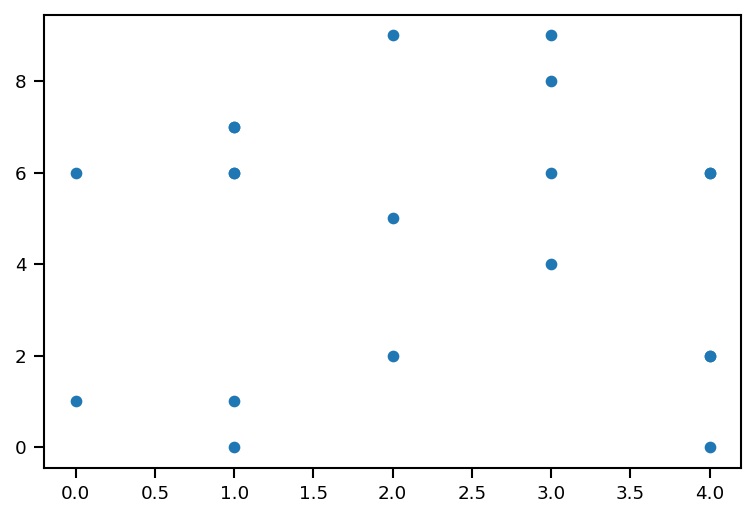

In [28]:
# Ok, now let's do a scatter plot
fig, ax = plt.subplots(dpi=150)
ax.scatter(x_samples, y_samples)

## Questions

+ Write code that finds the variance of $X+Y$.
+ Modify your code to find the variance of $3X + 5Y$.
+ Write code that finds the expectation of the function $f(X,Y) = XY^3$.

In [69]:
V_XpY=V_X+V_Y+2*C_XY
print(f"V[X+Y] = {V_XpY}")
V_3Xp5Y=9*V_X+25*V_Y+30*C_XY
print(f"V[3X+5Y] = {V_3Xp5Y}")

V[X+Y] = 10.112035570510258
V[3X+5Y] = 230.08862127252178


In [55]:
xs = np.arange(5)
ys = np.arange(10)
fmat = np.empty((5,10))
for i in range(5):
    for j in range(10):
        fmat[i,j] = xs[i]*ys[j]**3

In [77]:
E_xy3=np.sum(fmat*Anorm)
print(f"E[XY^3]={E_xy3}")

E[XY^3]=392.0162902900521
